In [2]:
def read_file_content(file_path):
    with open(file_path, 'r') as file:
        content = file.read()
    return content

In [3]:
descriptions = read_file_content('Flickr8k_text/Flickr8k.token.txt')
print(descriptions[:500])

1000268201_693b08cb0e.jpg#0	A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg#1	A girl going into a wooden building .
1000268201_693b08cb0e.jpg#2	A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg#3	A little girl climbing the stairs to her playhouse .
1000268201_693b08cb0e.jpg#4	A little girl in a pink dress going into a wooden cabin .
1001773457_577c3a7d70.jpg#0	A black dog and a spotted dog are fighting
1001773457_577c3a7


In [4]:
def create_img_desc_dict(document):
    img_dict = dict()

    for line in document.split('\n'):
        tokens = line.split()
        
        if len(tokens) < 2:
            continue

        image_id, image_desc = tokens[0], tokens[1:]
        image_id = image_id.split('.')[0]
        image_desc = ' '.join(image_desc)

        if image_id not in img_dict:
            img_dict[image_id] = list()

        img_dict[image_id].append(image_desc)

    return img_dict

In [5]:
img_dict = create_img_desc_dict(descriptions)
print('Total Size:', len(descriptions))

Total Size: 3395237


In [6]:
img_dict

{'1000268201_693b08cb0e': ['A child in a pink dress is climbing up a set of stairs in an entry way .',
  'A girl going into a wooden building .',
  'A little girl climbing into a wooden playhouse .',
  'A little girl climbing the stairs to her playhouse .',
  'A little girl in a pink dress going into a wooden cabin .'],
 '1001773457_577c3a7d70': ['A black dog and a spotted dog are fighting',
  'A black dog and a tri-colored dog playing with each other on the road .',
  'A black dog and a white dog with brown spots are staring at each other in the street .',
  'Two dogs of different breeds looking at each other on the road .',
  'Two dogs on pavement moving toward each other .'],
 '1002674143_1b742ab4b8': ['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .',
  'A little girl is sitting in front of a large painted rainbow .',
  'A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .',
  'There is a gi

In [7]:
alpha = []
invalidDesc = []

for key, text_list in img_dict.items():
        for i in range(len(text_list)):
            text = text_list[i]
            tokens = text.split()
            for word in tokens:
                  if(word.isalpha()==False):
                        alpha.append(word)
alpha = set(alpha)
alpha

{'!',
 '"',
 '#',
 '&',
 "'",
 "'n'",
 "'s",
 "'s-eye-view",
 "'slide",
 '(',
 ')',
 ',',
 '-',
 '-ependent',
 '.',
 '08',
 '1',
 '10',
 '104',
 '11',
 '12',
 '13',
 '13406',
 '157',
 '17',
 '19',
 '1915',
 '1923',
 '1950s',
 '2',
 '2008',
 '21',
 '22',
 '23',
 '25',
 '28',
 '281',
 '29',
 '3',
 '3-wheeler',
 '30',
 '32',
 '33',
 '3rd',
 '4',
 '4-wheel',
 '4-wheeler',
 '42',
 '4x4',
 '5',
 '50',
 '52',
 '528',
 '57',
 '58',
 '6',
 '625',
 '661',
 '7',
 '75',
 '8',
 '80',
 '84',
 '90',
 '93',
 '97',
 ':',
 ';',
 '?',
 'A-frame',
 'African-American',
 'African-american',
 'Blue-eyed',
 'Budweiser-sponsored',
 'Bull-branded',
 'Close-up',
 'Coca-Cola',
 'Cross-country',
 'D.C.',
 'Egytian-like',
 'German-shepherd',
 'Gray-haired',
 'Grey-blue',
 'I-beam',
 'Japanese-sponsored',
 'Jr.',
 'K2',
 'Kiss-costumed',
 'Long-haired',
 'Long-necked',
 'Middle-Eastern',
 'Middle-aged',
 'Mountain-Dew',
 'Mr.',
 'P.',
 'Pac-man',
 'R.V.',
 'RIF=ding',
 'Red-headed',
 'S.C.U.B.A.',
 'Spanish-style',


In [8]:
import string

def fix_descriptions(img_dict):
    # translation table to remove punctuation
    translation_table = str.maketrans('', '', string.punctuation)
    
    for key, text_list in img_dict.items():
        for i in range(len(text_list)):
            text = text_list[i]
            
            tokens = text.split()
            
            tokens = [word.lower() for word in tokens]
            tokens = [w.translate(translation_table) for w in tokens]
            
            # remove hanging 's' and 'a'
            tokens = [word for word in tokens if len(word) > 1]
            
            # remove extra spaces, special chars and others
            tokens = [word for word in tokens if word.isalpha()]
            
            # store as string
            text_list[i] = ' '.join(tokens)

fix_descriptions(img_dict)

In [9]:
img_dict

{'1000268201_693b08cb0e': ['child in pink dress is climbing up set of stairs in an entry way',
  'girl going into wooden building',
  'little girl climbing into wooden playhouse',
  'little girl climbing the stairs to her playhouse',
  'little girl in pink dress going into wooden cabin'],
 '1001773457_577c3a7d70': ['black dog and spotted dog are fighting',
  'black dog and tricolored dog playing with each other on the road',
  'black dog and white dog with brown spots are staring at each other in the street',
  'two dogs of different breeds looking at each other on the road',
  'two dogs on pavement moving toward each other'],
 '1002674143_1b742ab4b8': ['little girl covered in paint sits in front of painted rainbow with her hands in bowl',
  'little girl is sitting in front of large painted rainbow',
  'small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it',
  'there is girl with pigtails sitting in front of rainbow painting',
  'young girl with pi

In [10]:
import os
import random

all_image_files = [filename.split('.')[0] for filename in os.listdir('./Flicker8k_Dataset/') if filename.endswith('.jpg')]

common_image_files = list(set(all_image_files) & set(img_dict.keys()))

random.shuffle(common_image_files)

split_index = int(0.8 * len(common_image_files))

train_images = common_image_files[:split_index]
test_images = common_image_files[split_index:]

print("Train Image List:", len(train_images))
print("Test Image List:", len(test_images))


Train Image List: 6472
Test Image List: 1619


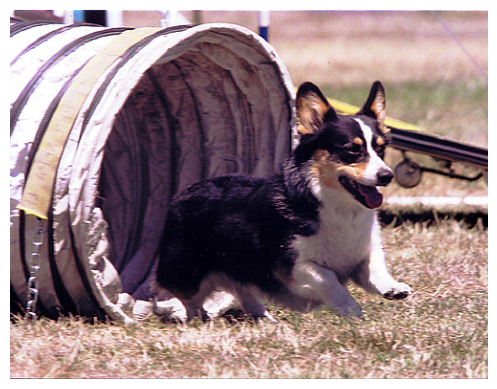

Captions:
- corgi runs out of tunnel
- dog runs out of tunnel on course
- dog running out of tunnel on obstacle course
- the dog is running out of the tunnel on dog obedience course
- the small brown and white dog is running out of small tunnel




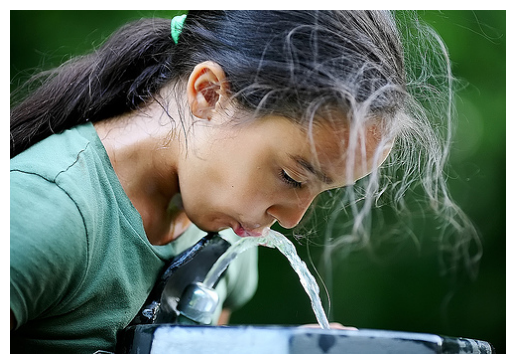

Captions:
- girl drinking from water fountain
- girl is drinking from drinking fountain
- girl takes sip from the water fountain
- woman with green shirt takes drink from water fountain
- the girl is taking drink from water fountain




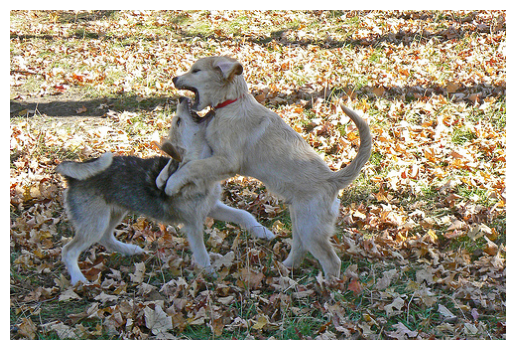

Captions:
- two dogs jumping on one another on grassy area covered in leaves
- two dogs play with each other in the leaves
- two puppies are playing in the leaves
- two puppies playing with each other surrounded by bunch of leaves
- two small dogs light and dark colored fighting on leaves




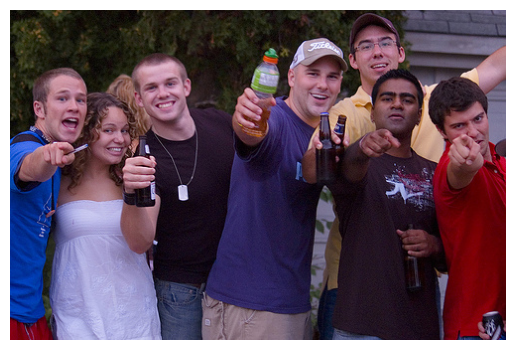

Captions:
- group of people hold drinks and point at the camera
- group of people are holding up drinks and pointing to the camera
- group of young people holding bottles and pointing at the camera
- several young people posing for this photo holding beers
- young adults stand pointing at the person taking the picture




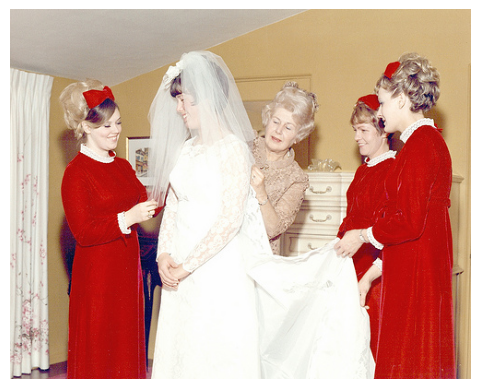

Captions:
- bride getting ready with her bridesmaids wearing red
- bride wearing her wedding dress receives help by her bridesmaids wearing red dresses
- family preparing for the wedding
- the woman getting married has beautiful gown on while her bride maids are wearing red dresses
- three bridesmaids in red and an older woman in beige are adjusting the bride white dress




In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Display 5 images with captions
for key in train_images[:5]:
    image_path = os.path.join('./Flicker8k_Dataset/', key + '.jpg')
    captions = img_dict[key]

    # Display image
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

    # Display captions
    print("Captions:")
    for caption in captions:
        print("-", caption)
    print("\n" + "="*50 + "\n")

In [12]:
# Add startseq and endseq for captions
train_images_dict = {}

for id in train_images:
    captions = img_dict[id]
    captions_with_start_end_seq = ['startseq ' + caption + ' endseq' for caption in captions]
    train_images_dict[id] = captions_with_start_end_seq

print(len(train_images_dict))

6472


In [13]:
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model

# InceptionV3 for Feature Extraction
base_model = InceptionV3(weights='imagenet')
base_model = Model(base_model.input, base_model.layers[-2].output)  # Layer before the top layer

In [14]:
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input
import numpy as np

def preprocess_image_for_inception(image_path):
    # Resize the image to 299x299 pixels as required by the Inception V3 model
    img = image.load_img(image_path, target_size=(299, 299))
    # Convert the PIL image to a numpy array with 3 dimensions
    image_array = image.img_to_array(img)
    # Add one more dimension to the array
    image_array = np.expand_dims(image_array, axis=0)
    # Preprocess the image using the preprocess_input() function from the Inception module
    preprocessed_image = preprocess_input(image_array)
    return preprocessed_image

In [15]:
# Function to encode a given image into a vector of size (2048, )
def encode_image_to_vector(image_path):
    preprocessed_image = preprocess_image_for_inception(image_path)  # Preprocess the image
    encoding_vector = base_model.predict(preprocessed_image)  # Get the encoding vector for the image
    flattened_vector = np.reshape(encoding_vector, encoding_vector.shape[1])  # Reshape from (1, 2048) to (2048, )
    return flattened_vector

In [16]:
train_image_encodings = {}

for filename in train_images:
    train_image_encodings[filename] = encode_image_to_vector('./Flicker8k_Dataset/' + filename + ".jpg")

1/1 [==============================] - 0s 51ms/step


In [17]:
test_image_encodings = {}

for filename in test_images:
    test_image_encodings[filename] = encode_image_to_vector('./Flicker8k_Dataset/' + filename + ".jpg")

1/1 [==============================] - 0s 46ms/step


In [18]:
print(len(train_image_encodings),len(test_image_encodings))

6472 1619


In [19]:
import pickle

# Save the intermediate step of generated train_image_encodings
with open("train_image_encodings.pkl", "wb") as encoded_pickle:
    pickle.dump(train_image_encodings, encoded_pickle)

In [20]:
# Save the intermediate step of generated train_image_encodings
with open("test_image_encodings.pkl", "wb") as encoded_pickle:
    pickle.dump(test_image_encodings, encoded_pickle)

In [21]:
# Collecting all captions for training data
collected_captions = []
for identifier, descriptions in train_images_dict.items():
    for caption in descriptions:
        collected_captions.append(caption)
len(collected_captions)

32360

In [22]:
# Filtering words that appear more than a minimum frequency of 10
min_word_frequency = 10
word_frequencies = {}
total_sentences = 0
for sentence in collected_captions:
    total_sentences += 1
    for word in sentence.split(' '):
        word_frequencies[word] = word_frequencies.get(word, 0) + 1

filtered_vocab = [word for word in word_frequencies if word_frequencies[word] >= min_word_frequency]
print('original words %d -> filtered words %d' % (len(word_frequencies), len(filtered_vocab)))

original words 7932 -> filtered words 1729


In [23]:
# Dictionaries for word-index and index-word mappings
index_to_word = {}
word_to_index = {}

# Starting index
index = 1
for word in filtered_vocab:
    word_to_index[word] = index
    index_to_word[index] = word
    index += 1

In [24]:
# Calculating the size of the vocabulary, including an extra element for padding
total_vocab_size = len(index_to_word) + 1 # Adding 1 for padding token
print(total_vocab_size)

1730


In [25]:
# Function to convert a dictionary of refined descriptions into a list
def convert_to_list(refined_descriptions):
	all_descriptions = []
	for key in refined_descriptions.keys():
		[all_descriptions.append(desc) for desc in refined_descriptions[key]]
	return all_descriptions

# Function to find the length of the longest description
def find_max_length(refined_descriptions):
	descriptions_list = convert_to_list(refined_descriptions)
	return max(len(desc.split()) for desc in descriptions_list)

# Calculating the maximum sequence length for the training data
max_desc_length = find_max_length(train_images_dict)
print('Maximum Description Length: %d' % max_desc_length)

Maximum Description Length: 34


In [26]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# Generator function for batch data preparation, to be used with model's fit method
def batch_data_generator(captions, image_features, word_index_map, max_desc_length, batch_size):
    input_img, input_seq, output_word = [], [], []
    batch_count = 0
    # Infinite loop, this generator will yield batches indefinitely
    while True:
        for img_id, caption_list in captions.items():
            batch_count += 1
            # Retrieve image features
            img_feature = image_features[img_id]
            for caption in caption_list:
                # Convert each word of the caption into its corresponding index
                indexed_seq = [word_index_map[word] for word in caption.split(' ') if word in word_index_map]
                # Create multiple training examples from each caption
                for i in range(1, len(indexed_seq)):
                    # Split into input and output pairs
                    input_seq_part, output_word_part = indexed_seq[:i], indexed_seq[i]
                    # Pad the input sequence
                    input_seq_part = pad_sequences([input_seq_part], maxlen=max_desc_length)[0]
                    # One hot encode the output word
                    output_word_part = to_categorical([output_word_part], num_classes=total_vocab_size)[0]
                    # Append to the respective lists
                    input_img.append(img_feature)
                    input_seq.append(input_seq_part)
                    output_word.append(output_word_part)
            # Yield a batch of data
            if batch_count == batch_size:
                yield [[np.array(input_img), np.array(input_seq)], np.array(output_word)]
                input_img, input_seq, output_word = [], [], []
                batch_count = 0

In [27]:
# Loading GloVe word embeddings
embeddings_folder = './'
word_embeddings = {}
embedding_file = open(os.path.join(embeddings_folder, 'glove.6B.200d.txt'), encoding="utf-8")

for line in embedding_file:
    parts = line.split()
    embedding_word = parts[0]
    embedding_vector = np.asarray(parts[1:], dtype='float32')
    word_embeddings[embedding_word] = embedding_vector
embedding_file.close()
print('Total word vectors loaded: %s' % len(word_embeddings))

Total word vectors loaded: 400000


In [28]:
embedding_dimensions = 200

# Create an embedding matrix where each row number corresponds to the index of the word
word_embedding_matrix = np.zeros((total_vocab_size, embedding_dimensions))

for word, index in word_to_index.items():
    # Retrieve the embedding vector for the given word
    embedding_vector = word_embeddings.get(word)
    if embedding_vector is not None:
        # Assign the embedding vector to the corresponding index in the matrix
        word_embedding_matrix[index] = embedding_vector

In [29]:
word_embedding_matrix.shape

(1730, 200)

In [30]:
from keras import Input, layers

# Define inputs for the model
image_input = Input(shape=(2048,))
image_model_layer1 = layers.Dropout(0.5)(image_input)
image_model_layer2 = layers.Dense(256, activation='relu')(image_model_layer1)

text_input = Input(shape=(max_desc_length,))
text_model_layer1 = layers.Embedding(total_vocab_size, embedding_dimensions, mask_zero=True)(text_input)
text_model_layer2 = layers.Dropout(0.5)(text_model_layer1)
text_model_layer3 = layers.LSTM(256)(text_model_layer2)

# Combining the outputs from both models
combined_decoder1 = layers.add([image_model_layer2, text_model_layer3])
combined_decoder2 = layers.Dense(256, activation='relu')(combined_decoder1)

# Final output layer
final_output = layers.Dense(total_vocab_size, activation='softmax')(combined_decoder2)

# Creating the model
model = Model(inputs=[image_input, text_input], outputs=final_output)

In [31]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 34)]                 0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 2048)]               0         []                            
                                                                                                  
 embedding (Embedding)       (None, 34, 200)              346000    ['input_3[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 2048)                 0         ['input_2[0][0]']             
                                                                                            

In [32]:
model.layers[2]

In [33]:
model.layers[2].set_weights([word_embedding_matrix])
model.layers[2].trainable = False

In [43]:

model.compile(loss='categorical_crossentropy', optimizer='adam')

In [35]:
epochs = 15
number_pics_per_batch = 50
steps = len(train_images_dict) // number_pics_per_batch

for i in range(epochs):
    generator = batch_data_generator(train_images_dict, train_image_encodings, word_to_index, max_desc_length, number_pics_per_batch)
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)
    model.save(os.path.join('./model_weights', 'model_' + str(i) + '.h5'))

129/129 [==============================] - 87s 663ms/step - loss: 4.7877


/Users/suman/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


129/129 [==============================] - 84s 651ms/step - loss: 3.1182


In [44]:
# Taking the best model
model.load_weights('./model_weights/model_14.h5')

In [37]:
def generate_caption(photo):
    start_token = 'startseq'
    for i in range(max_desc_length):
        # Convert the current sequence of words to their indices
        sequence_indices = [word_to_index[word] for word in start_token.split() if word in word_to_index]
        sequence_indices = pad_sequences([sequence_indices], maxlen=max_desc_length)
        # Predict the next word
        prediction = model.predict([photo, sequence_indices], verbose=0)
        next_word_index = np.argmax(prediction)
        next_word = index_to_word[next_word_index]
        start_token += ' ' + next_word
        # Break if end of sequence token is reached
        if next_word == 'endseq':
            break
    # Removing start and end tokens from the generated caption
    final_caption = start_token.split()[1:-1]
    final_caption = ' '.join(final_caption)
    return final_caption

In [45]:
generated_captions = {}

# Predicting whole test set for accuracy calculation
for i in range(len(test_image_encodings)):
    # Select the image
    pic = list(test_image_encodings.keys())[i]
    image = test_image_encodings[pic].reshape((1, 2048))

    # Generate and save the caption
    generated_captions[pic] = generate_caption(image)
    if i+1 == 400:
        break

In [39]:
from rouge import Rouge

def calculate_rouge(reference, hypothesis):
    rouge = Rouge()
    scores = rouge.get_scores(hypothesis, reference)
    return scores[0]['rouge-l']['f']

#Calculate the average of a list of scores
def calculate_average(scores):
    return sum(scores) / len(scores) if scores else 0

In [46]:
from nltk.translate.bleu_score import sentence_bleu as calculate_bleu, SmoothingFunction

# Dictionaries for storing average scores by image ID
bleu_scores, rouge_scores, meteor_scores = {}, {}, {}
smoothie = SmoothingFunction().method1

for image_id in generated_captions:
    if image_id in img_dict:
        # Lists for storing scores for each caption
        bleu, rouge = [], []

        # Calculate scores for each caption
        for test_caption in img_dict[image_id]:
            bleu.append(calculate_bleu(test_caption, generated_captions[image_id], weights=(0.5, 0.5), smoothing_function=smoothie))
            rouge.append(calculate_rouge(test_caption, generated_captions[image_id]))

        # Store the average scores for each metric
        bleu_scores[image_id] = calculate_average(bleu)
        rouge_scores[image_id] = calculate_average(rouge)

    else:
        print('Incorrect image ID:', image_id)

# Calculating the overall average for each score type
average_bleu = calculate_average(list(bleu_scores.values()))
average_rouge = calculate_average(list(rouge_scores.values()))

print(f"Average BLEU Score: {round(average_bleu, 5)}")
print(f"Average ROUGE Score: {round(average_rouge, 5)}")

Average BLEU Score: 0.02941
Average ROUGE Score: 0.16492


## Visualizing some results

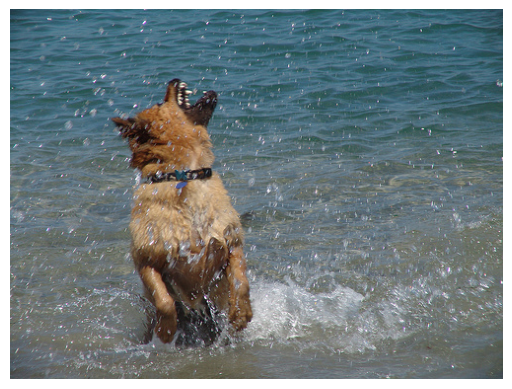

dog is running through the water



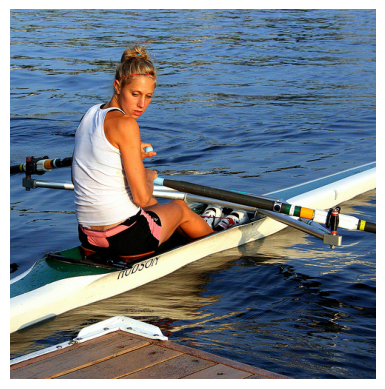

young boy in swimming pool



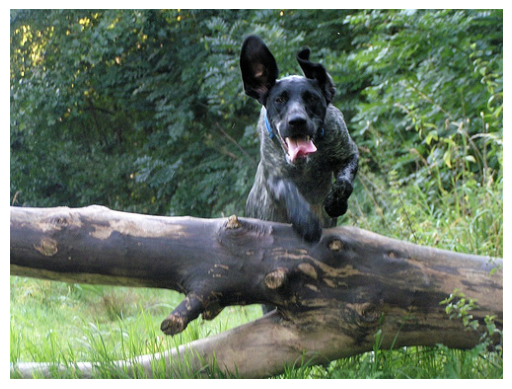

dog is running through the snow



In [49]:
import matplotlib.pyplot as plt

# randomly visualzing some results
for i in range(3):
    # Select the image
    pic = list(test_image_encodings.keys())[i]
    image = test_image_encodings[pic].reshape((1, 2048))
    
    # Read and display the image
    img_path = os.path.join('./Flicker8k_Dataset/', pic + '.jpg')
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Generate and print the caption
    generated_caption = generate_caption(image)
    print(generated_caption)
    print()

#### [ DON'T RUN ] System Requirements Generated from Dev Computer
The same has been saved as well. Refer requirements.txt

In [42]:
import os
import matplotlib
import keras
import numpy as np
import nltk
import rouge

print("Python version:", os.sys.version)
print("Matplotlib version:", matplotlib.__version__)
print("Keras version:", keras.__version__)
print("NumPy version:", np.__version__)
print("NLTK version:", nltk.__version__)
print("Rouge version:", rouge.__version__)

Python version: 3.9.6 (default, Aug 11 2023, 19:44:49) 
[Clang 15.0.0 (clang-1500.0.40.1)]
Matplotlib version: 3.8.2
Keras version: 2.15.0
NumPy version: 1.26.2
NLTK version: 3.8.1
Rouge version: 1.0.1
